In [1]:
import h5py
import pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
import pandas as pd
import graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, accuracy_score
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from lightgbm import early_stopping
from functions import *
import optuna
import time


In [2]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

In [3]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
                 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG',
                 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
                 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core',
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG',
                 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1',
                 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3',
                 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

electron_variable_list = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']


X = train[electron_variable_list]
y = train['Truth']


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (162500, 160)
Shape of y: (162500,)


In [4]:
# # 6x6 plot of the variable distributions (diagonal) and their mutual correlations (off-diagonal):

# amount_to_drop = 0

# index_dropping = np.arange(start = 0, stop = amount_to_drop, step = 1, dtype = 'int')



# X_trimmed = train.get(['p_numberOfPixelHits','correctedActualMu','Truth','p_charge', 'p_rawECluster', 'p_eClusterLr0',
#                        'p_eClusterLr1', 'p_eClusterLr3', 'p_ehad1',
#                    'p_DeltaE', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
#                  'p_R12', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_deltaEta1',
#                  'p_TRTPID', 'p_numberOfInnermostPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',]);       # Trim dataframe to have relevant variables

# X_trimmed = X_trimmed.drop(index_dropping)


# import seaborn as sns
# #sns.pairplot(X_trimmed, hue='Truth', diag_kind='hist')

## Setting up the correlation functions:

In [5]:

# # First print the correlations for ALL events:
# #print(X_trimmed.corr(method='pearson'))

# # Divide data into b-jets and non-b-jets:
# df_electron = X_trimmed.loc[X_trimmed['Truth'] == 1].drop(['Truth'], axis=1);
# df_non_electron = X_trimmed.loc[X_trimmed['Truth'] == 0].drop(['Truth'], axis=1);

# plot_corr = False

# if plot_corr:
#     # Make two separate correlation plots, also to see differences:
#     fig, ax = plt.subplots(1, 2, figsize=(18, 8))
#     sns.heatmap(df_electron.corr(), mask=np.zeros_like(df_electron.corr(), dtype=bool),
#                 cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0,
#                 square=True, ax=ax[0])
#     ax[0].set_title('Electrons');

#     sns.heatmap(df_non_electron.corr(), mask=np.zeros_like(df_non_electron.corr(), dtype=bool),
#                 cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0,
#                 square=True, ax=ax[1])
#     ax[1].set_title('Non-electrons');

## Decision Tree

In [6]:
# def plot_tree(depth, Nmin):
#     tree_clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=Nmin)
#     tree_clf.fit(X, y)
#     graph = Source(tree.export_graphviz(tree_clf, out_file=None, filled = True))
#     display(SVG(graph.pipe(format='svg')))
#     return tree_clf

In [7]:
# tree_clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)

# y_trimmed = X_trimmed['Truth']

# predicted_truth = tree_clf.fit(X_trimmed, y_trimmed).predict(X_trimmed)

# N, accuracy, fracWrong = confusion_matrix(predicted_truth, y_trimmed.to_numpy())
# print("\nDecision Tree BJET TAG:")
# print("  First number in parenthesis is the estimate, second is the MC truth:")
# print("  True-Negative (0,0)  = ", N[0][0])
# print("  False-Negative (0,1) = ", N[0][1])
# print("  False-Positive (1,0) = ", N[1][0])
# print("  True-Positive (1,1)  = ", N[1][1])
# print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
# print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)

## Set up Optuna to find the best hyper parameters

In [8]:
"""
Optuna example that demonstrates a pruner for LightGBM.

In this example, we optimize the validation accuracy of cancer detection using LightGBM.
We optimize both the choice of booster model and their hyperparameters. Throughout
training of models, a pruner observes intermediate results and stop unpromising trials.

You can run this example as follows:
    $ python lightgbm_integration.py

"""


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective_1(trial):

    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 3, 100),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


optuna_1 = True

if optuna_1:
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective_1, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-05-17 15:18:28,916] A new study created in memory with name: no-name-7e289c1b-f5b0-49f9-b56d-5162cb21c961
[I 2023-05-17 15:18:34,085] Trial 0 finished with value: 0.9448615384615384 and parameters: {'lambda_l1': 0.026044019052780837, 'lambda_l2': 0.000927554310140529, 'num_leaves': 66, 'feature_fraction': 0.5147877302131295, 'bagging_fraction': 0.8929173723653872, 'bagging_freq': 2, 'min_child_samples': 84}. Best is trial 0 with value: 0.9448615384615384.
[I 2023-05-17 15:18:39,641] Trial 1 finished with value: 0.94432 and parameters: {'lambda_l1': 7.266003057882348e-05, 'lambda_l2': 0.0027781704477529527, 'num_leaves': 54, 'feature_fraction': 0.798955742657881, 'bagging_fraction': 0.7579116003728863, 'bagging_freq': 1, 'min_child_samples': 91}. Best is trial 0 with value: 0.9448615384615384.
[I 2023-05-17 15:18:50,668] Trial 2 finished with value: 0.9450584615384615 and parameters: {'lambda_l1': 0.8692984383691444, 'lambda_l2': 2.1746684336655013e-08, 'num_leaves': 175, 'featu

Number of finished trials: 100
Best trial:
  Value: 0.9485046153846154
  Params: 
    lambda_l1: 0.0003334918348359383
    lambda_l2: 1.5210688556031948e-05
    num_leaves: 251
    feature_fraction: 0.9494733924040236
    bagging_fraction: 0.9504239139891125
    bagging_freq: 5
    min_child_samples: 40


## Setting up LightGBM

In [9]:

start=time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_test, truth_train, truth_test = train_test_split(X, y, test_size=0.25, random_state=42)
lgb_train = lgb.Dataset(input_train, truth_train)
lgb_eval  = lgb.Dataset(input_test,  truth_test, reference=lgb_train)
params = {
    'lambda_l1': '2.2435893231548385', # L1 regularization
    'lambda_l2': '8.404383685006304e-06', # L2 regularization
    'metric': 'auc',
    'num_leaves': '174',                    # Number of leaves in one tree
    'feature_fraction': '0.718152139442892', # Randomly select part of features on each iteration
    'bagging_fraction': '0.9683451799691203', # Randomly select part of data without resampling
    'bagging_freq': '3',                        # Frequency of bagging, 0 means disable bagging. k means perform bagging at every k iteration
    'min_child_samples': '90',                  # Minimum number of data need in a child(min_data_in_leaf)
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'binary',   # The outcome is binary, electron or not
    'verbose':-1,            # Suppress some output
}

# Train the model:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

cv_dic = lgb.cv(params,
                train_set = lgb_train,
                nfold = 5,
                num_boost_round=1000,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score = gbm.predict(input_test, num_iteration=gbm.best_iteration)  # Scores are floats in the range ]0,1[.
y_pred  = [1 if pred > 0.1 else 0 for pred in y_score]               # Classify electron yes or no (for comparison). 

#print(y_score)

acclight = np.sum(truth_test == y_pred)/(len(truth_test))

print(acclight)

# Print the time usage:
end = time.time()
print(f"Time used by LightGBM: {(end-start):.1f} s")


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.979497
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[99]	cv_agg's auc: 0.981343 + 0.000756362
0.9291569230769231
Time used by LightGBM: 53.3 s


## Setting up the feature importance, so that we can choose the 15 best parameters

['p_EptRatio' 'p_pt_track' 'p_deltaEta2' 'p_TRTPID' 'p_sigmad0' 'p_d0'
 'p_deltaEta1' 'p_d0Sig' 'p_deltaPhi2' 'p_Reta'
 'p_deltaPhiFromLastMeasurement' 'p_dPOverP' 'p_deltaPhiRescaled2'
 'p_ptconecoreTrackPtrCorrection' 'p_Rphi']


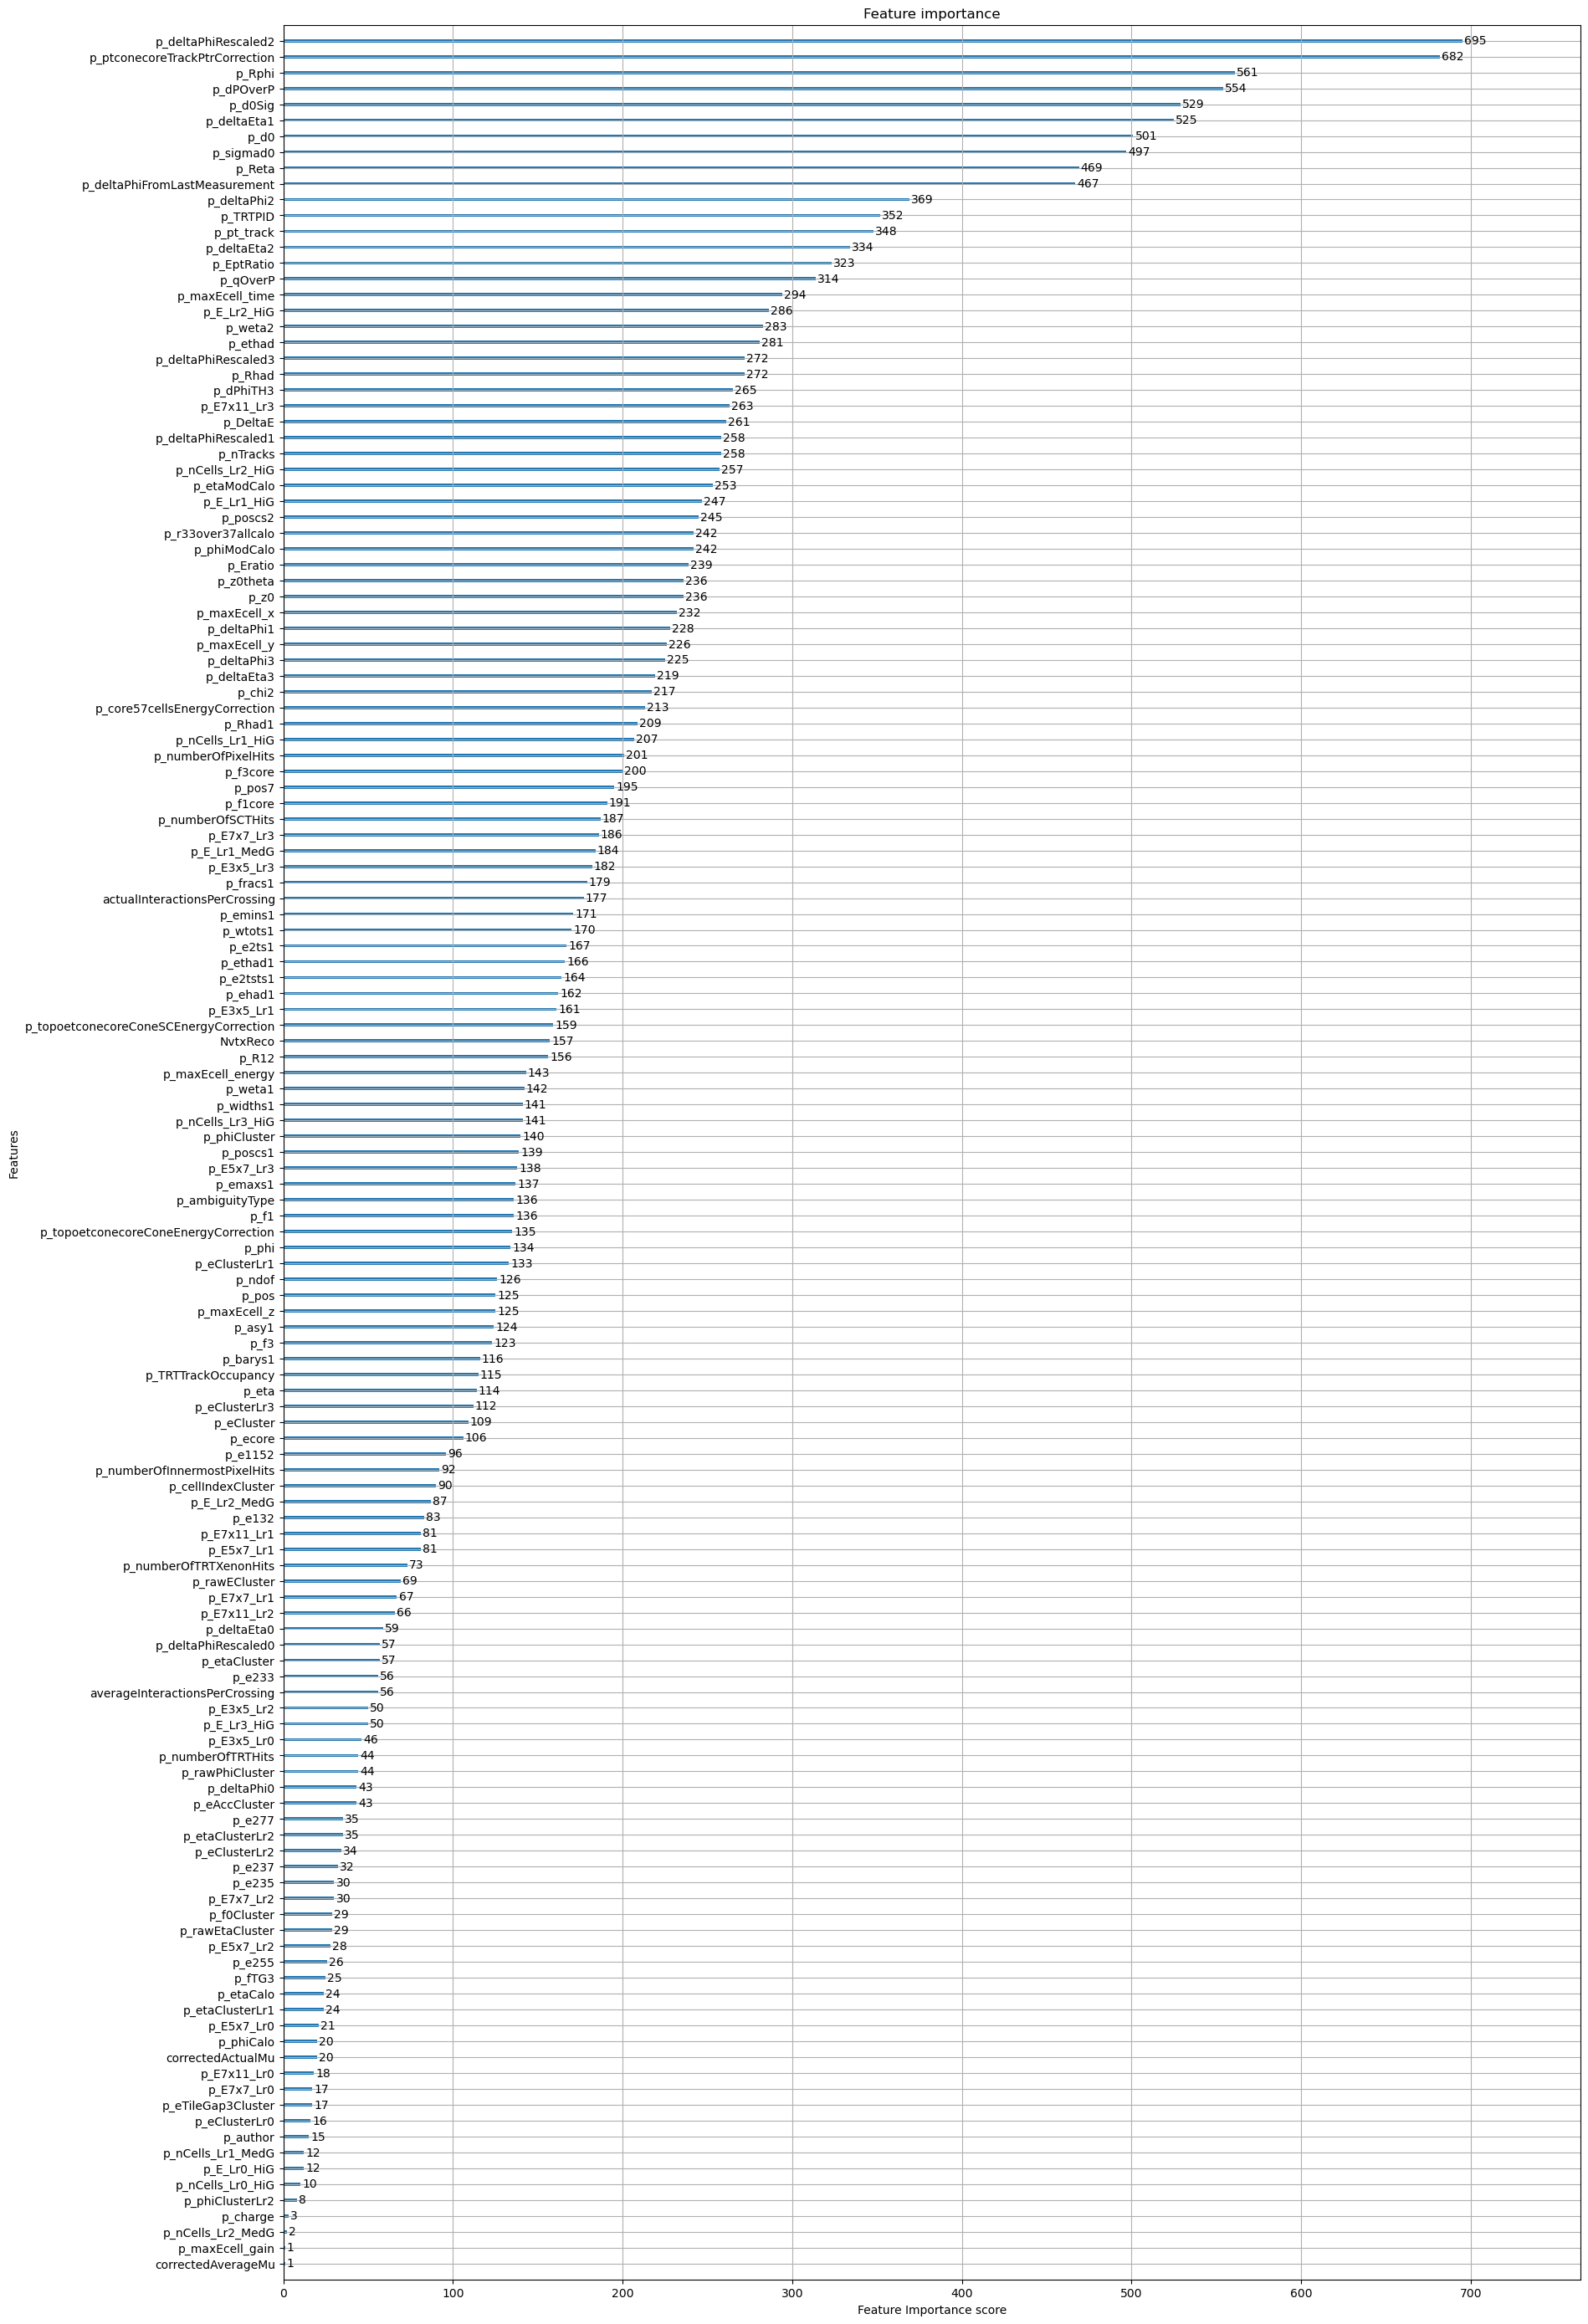

In [15]:
important_features = gbm.feature_importance()

important_features_index = np.argpartition(important_features, -15)[-15:]

five_most_important_features = np.argpartition(important_features, -5)[-5:]

five_trimmed_variables = np.asarray(electron_variable_list)[five_most_important_features]

gbm_trimmed_variables = np.asarray(electron_variable_list)[important_features_index]

X_gbm_trimmed = X[gbm_trimmed_variables]

print(gbm_trimmed_variables)

plot_importance = True

if plot_importance:
    lgb.plot_importance(gbm, grid = True, title = "Feature importance", xlabel = "Feature Importance score", ylabel = "Features", figsize = (20, 35))

## Setting up second optuna optimisation script:

In [11]:
def objective_2(trial):

    train_x, valid_x, train_y, valid_y = train_test_split(X_gbm_trimmed, y, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 3, 100),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy

optuna_2 = True

if optuna_2:
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective_2, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


[I 2023-05-17 15:25:54,070] A new study created in memory with name: no-name-c6818674-2591-4133-8130-2dfc5a8a71af
[I 2023-05-17 15:25:57,532] Trial 0 finished with value: 0.9368123076923077 and parameters: {'lambda_l1': 0.0014436867040732982, 'lambda_l2': 0.00017109437064828813, 'num_leaves': 178, 'feature_fraction': 0.613003619723989, 'bagging_fraction': 0.40704351551642226, 'bagging_freq': 1, 'min_child_samples': 82}. Best is trial 0 with value: 0.9368123076923077.
[I 2023-05-17 15:25:59,257] Trial 1 finished with value: 0.9375753846153846 and parameters: {'lambda_l1': 4.410224913697267, 'lambda_l2': 0.7731920461315569, 'num_leaves': 94, 'feature_fraction': 0.710568592130723, 'bagging_fraction': 0.6453799397917593, 'bagging_freq': 2, 'min_child_samples': 36}. Best is trial 1 with value: 0.9375753846153846.
[I 2023-05-17 15:25:59,843] Trial 2 finished with value: 0.9097107692307692 and parameters: {'lambda_l1': 9.585219104394263, 'lambda_l2': 3.257626010305355e-08, 'num_leaves': 2, 'f

Number of finished trials: 100
Best trial:
  Value: 0.9385846153846154
  Params: 
    lambda_l1: 0.0783154221823853
    lambda_l2: 1.3111653986780919e-05
    num_leaves: 110
    feature_fraction: 0.7304689881600156
    bagging_fraction: 0.5756493791558865
    bagging_freq: 7
    min_child_samples: 25


## Setting up the optimised boosted decision tree, with the 15 parameters

In [12]:
start_1 = time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train_opt, input_test_opt, truth_train_opt, truth_test_opt = train_test_split(X_gbm_trimmed, y, test_size=0.25, random_state=42)
lgb_train_opt = lgb.Dataset(input_train_opt, truth_train_opt)
lgb_eval_opt  = lgb.Dataset(input_test_opt,  truth_test_opt, reference=lgb_train_opt)
params_opt = {
    'lambda_l1': '0.007596508760356154',
    'lambda_l2': '1.0917727433666618e-05',
    'metric': 'auc',
    'num_leaves': '140',
    'feature_fraction': '0.7276267971909415',
    'bagging_fraction': '0.7229863643433292',
    'bagging_freq': '2',
    'min_child_samples': '96',
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'binary',   # The outcome is binary, electron or not
    'verbose':-1,            # Suppress some output
}

# Train the model:
gbm_opt = lgb.train(params_opt,
                lgb_train_opt,
                num_boost_round=1000,
                valid_sets=lgb_eval_opt,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

cv_opt_dic = lgb.cv(params_opt,
                train_set = lgb_train_opt,
                nfold = 5,
                num_boost_round=1000,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score_opt = gbm_opt.predict(input_test_opt, num_iteration=gbm.best_iteration)  # Scores are floats in the range ]0,1[.
y_pred_opt  = [1 if pred > 0.1 else 0 for pred in y_score_opt]               # Classify b-quark yes or no (for comparison). 

# Print the time usage:
end_1 = time.time()
print(f"Time used by LightGBM: {(end_1-start_1):.1f} ms")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.974218
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[76]	cv_agg's auc: 0.975962 + 0.000786247
Time used by LightGBM: 12.0 ms


## Set up ROC curves for this model:

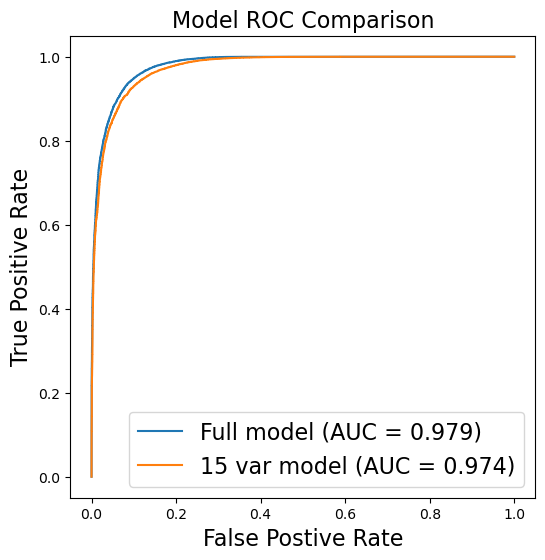

In [13]:
fpr, tpr, _ = roc_curve(truth_test, y_score)                  # False/True Positive Rate for our model
fpr_opt, tpr_opt, _ = roc_curve(truth_test, y_score_opt)                  # False/True Positive Rate for our model

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr, tpr)                        # This is the AUC score for our model
auc_score_opt = auc(fpr_opt, tpr_opt)                        # This is the AUC score for our model


# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [6,6])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Full model (AUC = {auc_score:5.3f})')
plt.plot(fpr_opt, tpr_opt, label=f'15 var model (AUC = {auc_score_opt:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.show()